In [13]:
# !pip install --upgrade gensim

Para trabajar Word2Vec vamos a hacerlo a través de la librería de `gensim`.

In [14]:
from gensim.models import Word2Vec, FastText
from gensim.test.utils import common_texts
import pandas as pd

El `corpus` que vamos a utilizar es commont_texts que es un corpus de prueba que viene con la librería.

In [15]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

Vamos a crear el modelo. Le pasamos el corpus y pedimos que como mínimo la palabra debe aparecer 1 vez para tenerla en cuenta y que el vector tenga 5 dimensiones.

In [16]:
w2v = Word2Vec(common_texts,min_count=1,vector_size=5)


Podemos ver que el vocabulario es 12, es decir tenemos 12 posibles palabras, no podemos utilizar una palabra que no esté en el vocabulario.

In [17]:
print(w2v)

Word2Vec<vocab=12, vector_size=5, alpha=0.025>


Si intentamos acceder a una palabra que no está en el vocabulario nos dará un error.

In [18]:
try:
    w2v.wv[['movie']]
except KeyError:
    print('word not found')

word not found


Podemos devolver la codificación de una palabra que pertenezca al vocabulario.

In [19]:
try:
    print(w2v.wv[['human']])
except KeyError:
    print('word not found')

[[-0.08924355  0.09035001 -0.13573924 -0.07096978  0.18797016]]


Vamos a buscar las 5 palabras más similares a `computer` junto al grado de similitud.

In [20]:
w2v.wv.most_similar('computer', topn=5)


[('minors', 0.4151745140552521),
 ('time', 0.18495497107505798),
 ('interface', 0.05030104145407677),
 ('system', 0.028436651453375816),
 ('eps', -0.05752073973417282)]

Ahora para `user`.

In [21]:
w2v.wv.most_similar('user', topn=5)


[('eps', 0.7670227289199829),
 ('graph', 0.6180020570755005),
 ('time', 0.5487501621246338),
 ('response', 0.44477587938308716),
 ('survey', 0.31393176317214966)]

¿Cómo ha codificado cada palabra?

In [22]:
vocab = list(w2v.wv.index_to_key)
vectors = [w2v.wv[word] for word in vocab]

In [23]:
data = {'Palabra': vocab,
        'Codificación Vectorial': vectors}

df = pd.DataFrame(data)
print(df)

      Palabra                             Codificación Vectorial
0      system  [-0.0107245445, 0.004728603, 0.10206699, 0.180...
1       graph  [-0.14233617, 0.12917742, 0.17945977, -0.10030...
2       trees  [0.1476101, -0.03066945, -0.09073229, 0.131081...
3        user  [-0.036343347, 0.057506733, 0.019880833, -0.16...
4      minors  [0.14623532, 0.10140524, 0.13515386, 0.0152573...
5         eps  [-0.06810732, -0.018928051, 0.115371466, -0.15...
6        time  [-0.15023164, -0.018600846, 0.19076237, -0.146...
7    response  [-0.0387697, 0.16154389, -0.11860459, 0.000906...
8      survey  [-0.192071, 0.10014586, -0.17519173, -0.087836...
9    computer  [-0.005925377, -0.1532694, 0.1923508, 0.099670...
10  interface  [-0.16316712, 0.08989341, -0.08270347, 0.01649...
11      human  [-0.08924355, 0.09035001, -0.13573924, -0.0709...


Vamos a ver en un espacio bi-dimensional cómo se han codificado las palabras.

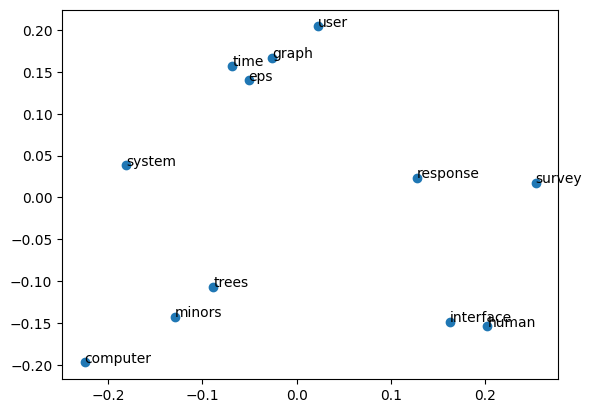

In [24]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

X = vectors
pca = PCA(n_components=2)

result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(df['Palabra'])

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()